In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pylab 

%matplotlib inline
from scipy import stats

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
loandf =pd.read_csv("./loan.csv", index_col=None, na_values=['NA'],sep=',',low_memory=False, encoding = "latin-1",parse_dates=['issue_d'])
loandf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loandf.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

In [6]:
loandf.shape

(39717, 111)

In [7]:
loandf.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
loandf.isnull().sum()*100/loandf.shape[0] 

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [9]:
loandf = loandf.dropna(axis=1, how='all')

In [10]:
loandf.isnull().sum()*100/loandf.shape[0] 

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [11]:
loandf = loandf.dropna(thresh=len(loandf) * 0.5, axis=1)

In [12]:
loandf.shape

(39717, 54)

In [13]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
sum(loandf.duplicated(subset = "id")) == 0

True

Creating Loan Period column as Numeric

In [15]:
loandf['loanPeriod'] = loandf['term'].str[1:4].astype(int)
loandf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loanPeriod
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,36
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,60


In [16]:
loandf["zip_code_num"] = loandf["zip_code"].str.replace('x','')
loandf["zip_code_num"] = loandf["zip_code_num"].astype(int)

In [17]:
loandf.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [18]:
loandf = loandf.loc[:, loandf.nunique() != 1]

In [19]:
loandf.shape

(39717, 47)

In [20]:
loandf = loandf.drop([ 'emp_title', 'url' ,'desc', 'title', 'zip_code', 'term'], axis=1)

In [22]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [24]:
loandf['earliest_cr_line']

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
4        Jan-96
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 39717, dtype: object

In [25]:
loandf = loandf.drop(['earliest_cr_line'],axis =1)

In [26]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [27]:
loandf['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

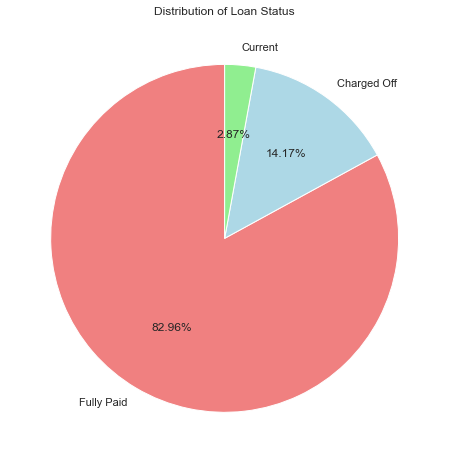

In [30]:
sns.set(style="whitegrid")

# Create a pie chart for the distribution of loan status
plt.figure(figsize=(8, 8))
loan_status_counts = loandf['loan_status'].value_counts()
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.2f%%', startangle=90, colors=['lightcoral', 'lightblue','lightgreen'])
plt.title('Distribution of Loan Status')
plt.show()

In [31]:
loandf['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
house                   381
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

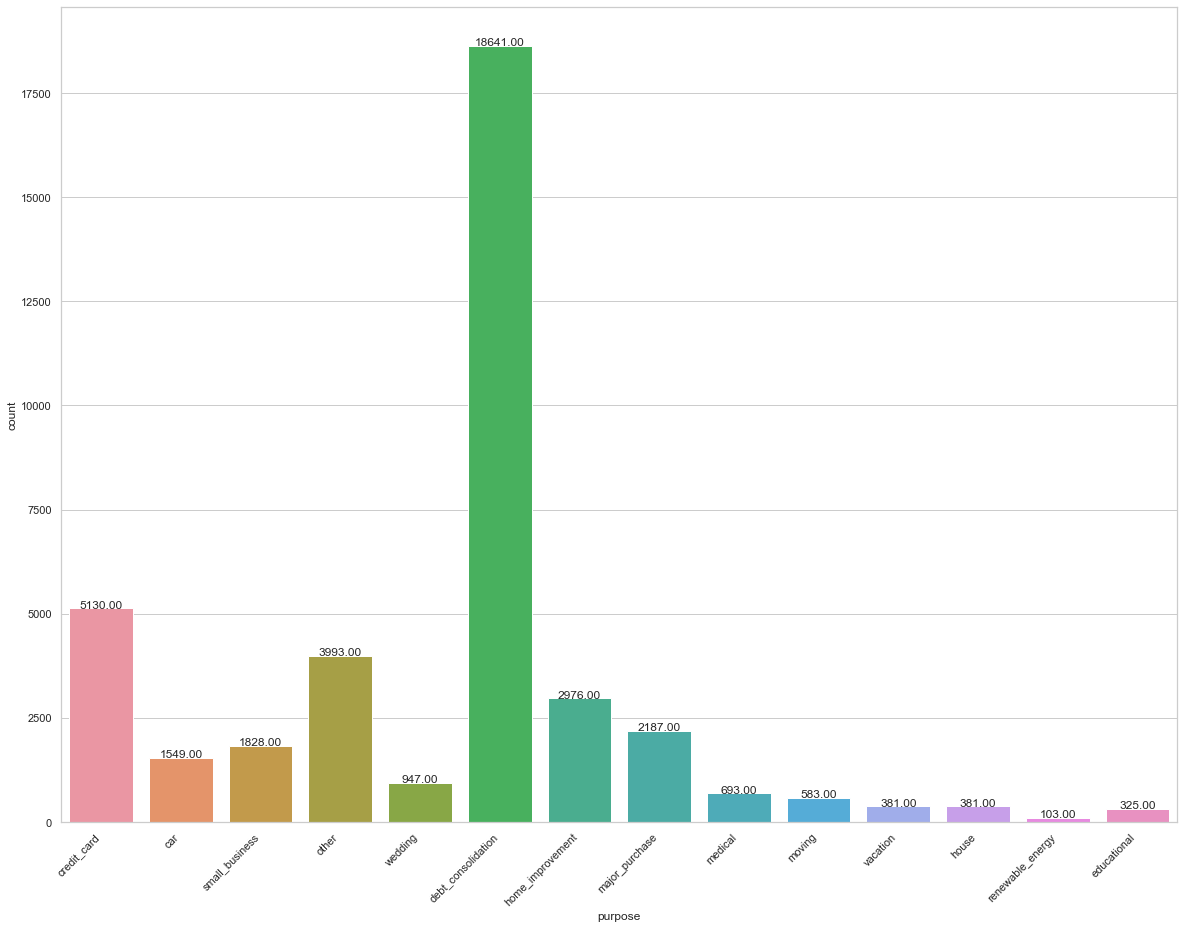

In [32]:
plt.figure(figsize=(20, 15))
ax = sns.countplot(x="purpose", data=loandf)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, '{:1.2f}'.format(height), ha="center")

plt.show()

In [33]:
loandf_purpose = pd.pivot_table(loandf, values='loan_amnt', index='purpose', columns='loan_status', aggfunc='count')
loandf_purpose

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160.0,50.0,1339.0
credit_card,542.0,103.0,4485.0
debt_consolidation,2767.0,586.0,15288.0
educational,56.0,NaN,269.0
home_improvement,347.0,101.0,2528.0
house,59.0,14.0,308.0
major_purchase,222.0,37.0,1928.0
medical,106.0,12.0,575.0
moving,92.0,7.0,484.0


In [34]:
loandf_purpose.loc[pd.isnull(loandf_purpose['Current']), ['Current']] = 0
loandf_purpose

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160.0,50.0,1339.0
credit_card,542.0,103.0,4485.0
debt_consolidation,2767.0,586.0,15288.0
educational,56.0,0.0,269.0
home_improvement,347.0,101.0,2528.0
house,59.0,14.0,308.0
major_purchase,222.0,37.0,1928.0
medical,106.0,12.0,575.0
moving,92.0,7.0,484.0


In [36]:
loandf_purpose['Aggregate'] = loandf_purpose['Charged Off'] + loandf_purpose['Current'] + loandf_purpose['Fully Paid']
loandf_purpose['Charged Off%'] = round(loandf_purpose['Charged Off']/loandf_purpose['Aggregate'] *100, 2)
loandf_purpose['Current%'] = round(loandf_purpose['Current']/loandf_purpose['Aggregate'] *100, 2)
loandf_purpose['Fully Paid %'] = round(loandf_purpose['Fully Paid']/loandf_purpose['Aggregate'] *100, 2)
loandf_purpose

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
purpose,,,,,,,
car,160.0,50.0,1339.0,1549.0,10.33,3.23,86.44
credit_card,542.0,103.0,4485.0,5130.0,10.57,2.01,87.43
debt_consolidation,2767.0,586.0,15288.0,18641.0,14.84,3.14,82.01
educational,56.0,0.0,269.0,325.0,17.23,0.00,82.77
home_improvement,347.0,101.0,2528.0,2976.0,11.66,3.39,84.95
house,59.0,14.0,308.0,381.0,15.49,3.67,80.84
major_purchase,222.0,37.0,1928.0,2187.0,10.15,1.69,88.16
medical,106.0,12.0,575.0,693.0,15.30,1.73,82.97
moving,92.0,7.0,484.0,583.0,15.78,1.20,83.02


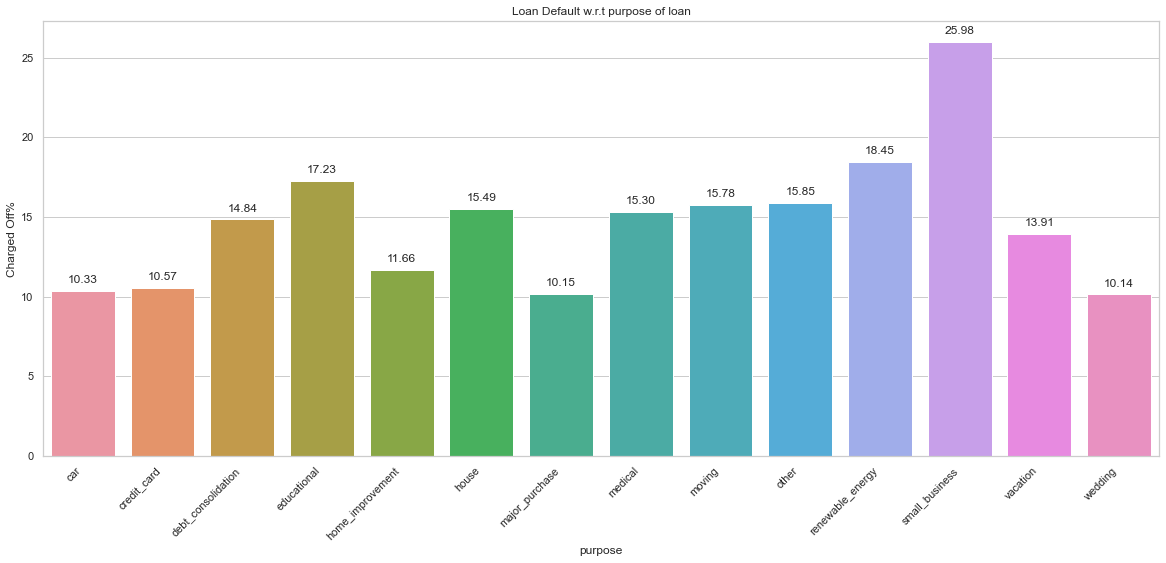

In [38]:
plt.figure(figsize=(20, 8))
plt.title('Loan Default w.r.t purpose of loan')
ax=sns.barplot(x='purpose',y = "Charged Off%", data=loandf_purpose.reset_index())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.5,'{:1.2f}'.format(height), ha="center") 

In [39]:
loandf['loanPeriod'].value_counts()

36    29096
60    10621
Name: loanPeriod, dtype: int64

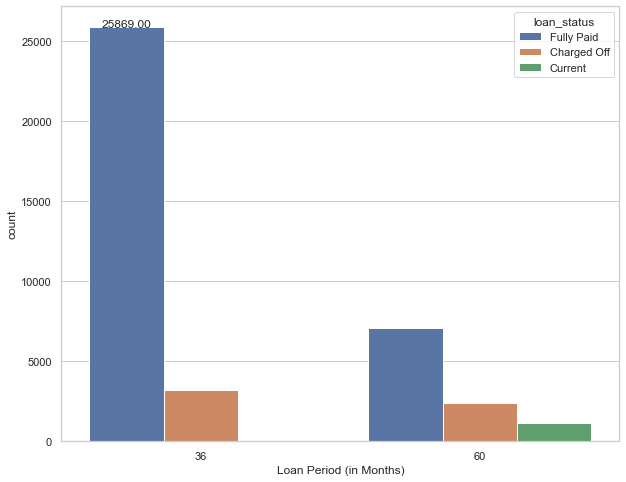

In [47]:
from matplotlib.pyplot import show
plt.figure(figsize=(10, 8))
ax=sns.countplot(x = "loanPeriod", hue = "loan_status", data = loandf)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.5,'{:1.2f}'.format(height), ha="center") 
    ax.set_xlabel("Loan Period (in Months)")
    show()



In [48]:
loandf_duration = pd.pivot_table(loandf, values='loan_amnt', index='loanPeriod', columns='loan_status', aggfunc='count')
loandf_duration

loan_status,Charged Off,Current,Fully Paid
loanPeriod,,,
36,3227.0,NaN,25869.0
60,2400.0,1140.0,7081.0


In [49]:
loandf_duration.loc[pd.isnull(loandf_duration['Current']), ['Current']] = 0
loandf_duration

loan_status,Charged Off,Current,Fully Paid
loanPeriod,,,
36,3227.0,0.0,25869.0
60,2400.0,1140.0,7081.0


In [50]:
loandf_duration['Aggregate'] = loandf_duration['Charged Off'] + loandf_duration['Current'] + loandf_duration['Fully Paid']
loandf_duration['Charged Off%'] = round(loandf_duration['Charged Off']/loandf_duration['Aggregate'] *100, 2)
loandf_duration['Current%'] = round(loandf_duration['Current']/loandf_duration['Aggregate'] *100, 2)
loandf_duration['Fully Paid %'] = round(loandf_duration['Fully Paid']/loandf_duration['Aggregate'] *100, 2)


loandf_duration

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
loanPeriod,,,,,,,
36,3227.0,0.0,25869.0,29096.0,11.09,0.00,88.91
60,2400.0,1140.0,7081.0,10621.0,22.60,10.73,66.67


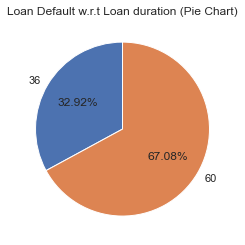

In [58]:
plt.figure(figsize=(6, 4))
plt.title('Loan Default w.r.t Loan duration')
ax = sns.barplot(x='loanPeriod', y="Charged Off%", data=loandf_duration.reset_index(), estimator=np.median)
 
# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.25, '{:1.2f}'.format(height), ha="center")
 
# Extract data from the bar plot
labels = loandf_duration.reset_index()['loanPeriod'].tolist()
sizes = [p.get_height() for p in ax.patches]
 
# Convert the bar plot data into percentages
total = sum(sizes)
sizes = [(size / total) * 100 for size in sizes]
 
# Create a pie chart
plt.clf()  # Clear the existing figure
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Loan Default w.r.t Loan duration (Pie Chart)')
 
# Display the pie chart
plt.show()

In [59]:
def dti_level(x):
    'divide the time of the day into four categories'
    if x < 5:
        return "A(<5)"
    elif 5 <= x < 10:
        return "B(5-10)"
    elif 10 <= x < 15:
        return "C(10-15)"
    elif 15 <= x < 20:
        return "D(15-20)"
    else:
        return "E(>20)"

loandf['dti_level'] = loandf.dti.apply(lambda x: dti_level(x))

In [60]:
loandf['dti_level'].value_counts()

C(10-15)    9893
D(15-20)    9108
B(5-10)     8062
E(>20)      7514
A(<5)       5140
Name: dti_level, dtype: int64

In [61]:
loandf_dti = pd.pivot_table(loandf, values='loan_amnt', index='dti_level', columns='loan_status', aggfunc='count')
loandf_dti['Aggregate'] = loandf_dti['Charged Off'] + loandf_dti['Current'] + loandf_dti['Fully Paid']
loandf_dti['Charged Off%'] = round(loandf_dti['Charged Off']/loandf_dti['Aggregate'] *100, 2)
loandf_dti['Current%'] = round(loandf_dti['Current']/loandf_dti['Aggregate'] *100, 2)
loandf_dti['Fully Paid %'] = round(loandf_dti['Fully Paid']/loandf_dti['Aggregate'] *100, 2)
loandf_dti

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
dti_level,,,,,,,
A(<5),625,96,4419,5140,12.16,1.87,85.97
B(5-10),1001,201,6860,8062,12.42,2.49,85.09
C(10-15),1399,269,8225,9893,14.14,2.72,83.14
D(15-20),1394,284,7430,9108,15.31,3.12,81.58
E(>20),1208,290,6016,7514,16.08,3.86,80.06


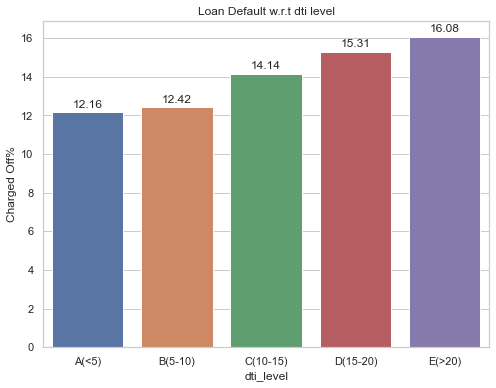

In [62]:
plt.figure(figsize=(8, 6))
plt.title('Loan Default w.r.t dti level')
ax=sns.barplot(x='dti_level',y = "Charged Off%", data=loandf_dti.reset_index())
#plt.show()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.25,'{:1.2f}'.format(height),ha="center") 

In [63]:
loandf['total_acc'].value_counts()

16    1471
15    1462
17    1457
14    1445
20    1428
      ... 
74       1
81       1
80       1
77       1
71       1
Name: total_acc, Length: 82, dtype: int64

In [64]:
loandf['total_acc'] = loandf['total_acc'].apply(lambda x: x if x< 10 else '10+')

In [65]:
loandf_total_acc = pd.pivot_table(loandf, values='loan_amnt', index='total_acc', columns='loan_status', aggfunc='count')
loandf_total_acc

loan_status,Charged Off,Current,Fully Paid
total_acc,,,
2,1.0,NaN,3.0
3,42.0,3.0,137.0
4,79.0,5.0,336.0
5,91.0,9.0,452.0
6,107.0,9.0,567.0
7,132.0,15.0,681.0
8,172.0,17.0,817.0
9,166.0,24.0,890.0
10+,4837.0,1058.0,29067.0


In [67]:
loandf_total_acc.loc[pd.isnull(loandf_total_acc['Current']), ['Current']] = 0
loandf_total_acc['Aggregate'] = loandf_total_acc['Charged Off'] + loandf_total_acc['Current'] + loandf_total_acc['Fully Paid']
loandf_total_acc['Charged Off%'] = round(loandf_total_acc['Charged Off']/loandf_total_acc['Aggregate'] *100, 2)
loandf_total_acc['Current%'] = round(loandf_total_acc['Current']/loandf_total_acc['Aggregate'] *100, 2)
loandf_total_acc['Fully Paid %'] = round(loandf_total_acc['Fully Paid']/loandf_total_acc['Aggregate'] *100, 2)
loandf_total_acc

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
total_acc,,,,,,,
2,1.0,0.0,3.0,4.0,25.00,0.00,75.00
3,42.0,3.0,137.0,182.0,23.08,1.65,75.27
4,79.0,5.0,336.0,420.0,18.81,1.19,80.00
5,91.0,9.0,452.0,552.0,16.49,1.63,81.88
6,107.0,9.0,567.0,683.0,15.67,1.32,83.02
7,132.0,15.0,681.0,828.0,15.94,1.81,82.25
8,172.0,17.0,817.0,1006.0,17.10,1.69,81.21
9,166.0,24.0,890.0,1080.0,15.37,2.22,82.41
10+,4837.0,1058.0,29067.0,34962.0,13.84,3.03,83.14


In [68]:
loandf['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [69]:
loandf['home_ownership'] = loandf['home_ownership'].apply(lambda x: x if x != 'NONE' else 'OTHER')
loandf['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER         101
Name: home_ownership, dtype: int64

In [70]:
loandf_home_ownership = pd.pivot_table(loandf, values='loan_amnt', index='home_ownership', columns='loan_status', aggfunc='count')
loandf_home_ownership.loc[pd.isnull(loandf_home_ownership['Current']), ['Current']] = 0
loandf_home_ownership['Aggregate'] = loandf_home_ownership['Charged Off'] + loandf_home_ownership['Current'] + loandf_home_ownership['Fully Paid']
loandf_home_ownership['Charged Off%'] = round(loandf_home_ownership['Charged Off']/loandf_home_ownership['Aggregate'] *100, 2)
loandf_home_ownership['Current%'] = round(loandf_home_ownership['Current']/loandf_home_ownership['Aggregate'] *100, 2)
loandf_home_ownership['Fully Paid %'] = round(loandf_home_ownership['Fully Paid']/loandf_home_ownership['Aggregate'] *100, 2)
loandf_home_ownership

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
home_ownership,,,,,,,
MORTGAGE,2327.0,638.0,14694.0,17659.0,13.18,3.61,83.21
OTHER,18.0,0.0,83.0,101.0,17.82,0.00,82.18
OWN,443.0,83.0,2532.0,3058.0,14.49,2.71,82.80
RENT,2839.0,419.0,15641.0,18899.0,15.02,2.22,82.76


In [72]:
print(loandf.annual_inc.max())
print(loandf.annual_inc.min())

6000000.0
4000.0


In [73]:
def sal_range(x):
    'divide the time of the day into four categories'
    if x < 10000:
        return "A(<10K)"
    elif 10000 <= x < 20000:
        return "B(10K-20K)"
    elif 20000 <= x < 50000:
        return "C(20K-50K)"
    elif 50000 <= x < 750000:
        return "D(50K-75K)"
    elif 75000 <= x < 100000:
        return "E(75K-100K)"
    else:
        return "F(>100K)"

loandf['salary_range'] = loandf.annual_inc.apply(lambda x: sal_range(x))  
loandf['salary_range'].value_counts()


D(50K-75K)    24998
C(20K-50K)    13621
B(10K-20K)      986
A(<10K)          80
F(>100K)         32
Name: salary_range, dtype: int64

In [74]:
loandf_salary_range = pd.pivot_table(loandf, values='loan_amnt', index='salary_range', columns='loan_status', aggfunc='count')
loandf_salary_range.loc[pd.isnull(loandf_salary_range['Current']), ['Current']] = 0
loandf_salary_range['Aggregate'] = loandf_salary_range['Charged Off'] + loandf_salary_range['Current'] + loandf_salary_range['Fully Paid']
loandf_salary_range['Charged Off%'] = round(loandf_salary_range['Charged Off']/loandf_salary_range['Aggregate'] *100, 2)
loandf_salary_range['Current%'] = round(loandf_salary_range['Current']/loandf_salary_range['Aggregate'] *100, 2)
loandf_salary_range['Fully Paid %'] = round(loandf_salary_range['Fully Paid']/loandf_salary_range['Aggregate'] *100, 2)
loandf_salary_range

loan_status,Charged Off,Current,Fully Paid,Aggregate,Charged Off%,Current%,Fully Paid %
salary_range,,,,,,,
A(<10K),14.0,1.0,65.0,80.0,17.50,1.25,81.25
B(10K-20K),213.0,7.0,766.0,986.0,21.60,0.71,77.69
C(20K-50K),2222.0,319.0,11080.0,13621.0,16.31,2.34,81.34
D(50K-75K),3175.0,813.0,21010.0,24998.0,12.70,3.25,84.05
F(>100K),3.0,0.0,29.0,32.0,9.38,0.00,90.62


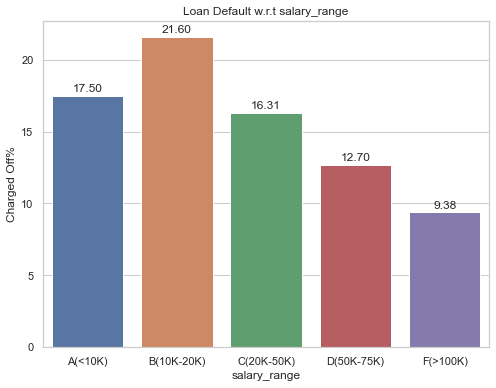

In [75]:
plt.figure(figsize=(8, 6))
plt.title('Loan Default w.r.t salary_range')
ax=sns.barplot(x= 'salary_range',y = "Charged Off%", data=loandf_salary_range.reset_index())
#plt.show()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.25,'{:1.2f}'.format(height),ha="center") 